In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/SamSung.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date     Open     High      Low    Close     Adj Close    Volume
0  2018-12-12  40250.0  40700.0  40150.0  40450.0  35281.417969  12024279
1  2018-12-13  40650.0  40750.0  40000.0  40000.0  34888.921875  26254646
2  2018-12-14  40200.0  40200.0  38700.0  38950.0  33973.089844  19671783
3  2018-12-17  38650.0  39600.0  38650.0  39150.0  34147.535156  11532968
4  2018-12-18  38300.0  39200.0  38300.0  38900.0  33929.472656  11042101


In [58]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [59]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 10, 'gamma': 'scale'}
Best score: 21456391.467079293


In [60]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([71588.31433235, 71685.15667802, 71298.59771732, 71106.06628644,
       70818.05834032, 70626.50025186, 70913.96469575, 71588.31433235,
       71879.28226593, 71976.57683356, 72074.03316944, 72761.16725094,
       72074.03316944, 72563.91613786, 72959.20682317, 72662.44489654,
       71782.14407286, 70818.05834032, 69862.63101066, 70913.96469575,
       71395.04098814, 71976.57683356, 72761.16725094, 72860.08678709,
       72860.08678709, 72171.65647484, 70913.96469575, 69862.63101066,
       70339.69490783, 69957.98262689, 70053.35767264, 71106.06628644,
       71782.14407286, 70435.23518423, 70626.50025186, 70435.23518423,
       69671.96955349, 68622.00708214, 68717.68526289, 68622.00708214,
       69099.8129382 , 68046.24367361, 68334.52307252, 67466.73231035,
       66686.55877716, 66391.48120901, 66292.79949869, 66686.55877716,
       67272.55170696, 66686.55877716, 68238.52575804, 66980.22607223,
       66588.35913013, 66784.60157024, 67272.55170696, 66784.60157024,
      

In [61]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[73500.]])

In [62]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([72860.08678709]),
 array([72230.3975805]),
 array([71617.73706848]),
 array([71027.00307603]),
 array([70461.04384308]),
 array([69920.83490921]),
 array([69405.8412315]),
 array([68914.43333002]),
 array([68444.26777277]),
 array([67992.58935436]),
 array([67556.44688277]),
 array([67132.83316787]),
 array([66718.76651944]),
 array([66311.33106293]),
 array([65907.69042265]),
 array([65505.08607467]),
 array([65100.82896794]),
 array([64692.29118478]),
 array([64276.90346221]),
 array([63852.16418706]),
 array([63415.66579843]),
 array([62965.14507683]),
 array([62498.56409349]),
 array([62014.22788962]),
 array([61510.94216115]),
 array([60988.20796977]),
 array([60446.43955467]),
 array([59887.1755762]),
 array([59313.23618579]),
 array([58728.76500937])]

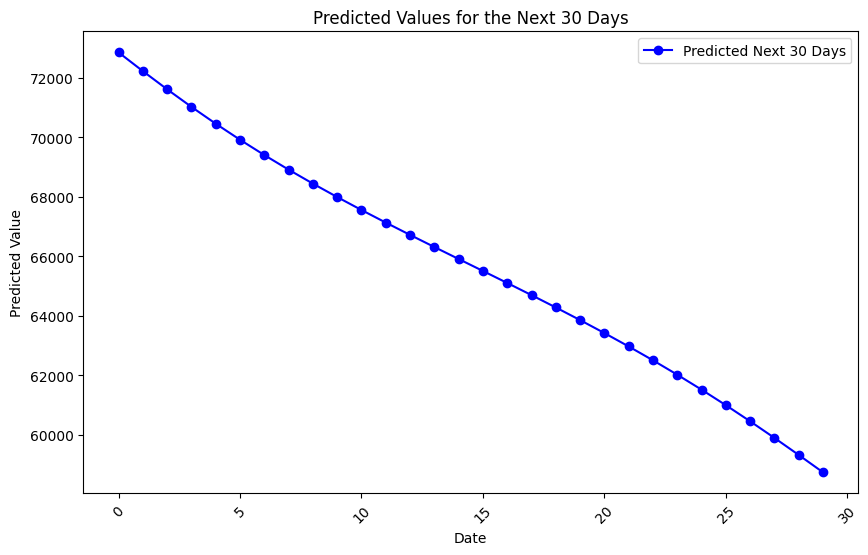

In [63]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [64]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [65]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    473.528449
dtype: float64
Testing MAPE: 0.005515571728460531
Testing MAE: 386.83740185693915


In [66]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    473.528449
dtype: float64
Testing MAPE: 0.005515571728460531
Testing MAE: 386.83740185693915


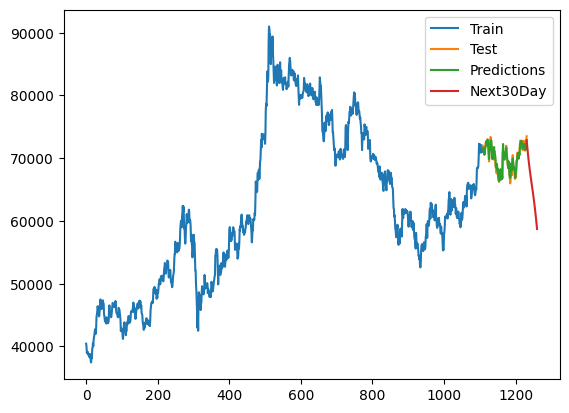

In [67]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()